<a href="https://colab.research.google.com/github/Ruthnguli/Week-4-IP/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_09_Ruth_Nguli_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moringa School Week4 IP : PYTHON NOTEBOOK

In [ ]:
#Research Question

#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
#Bonus Questions (Optional)

#What is the most popular hour for returning cars?
#What station is the most popular?
#Overall?
#At the most popular picking hour?
#What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?
#Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

In [ ]:
# Importing the libraries we will need 

# Importing the pandas library
# 
import pandas as pd

# Importing the numpy library
#
import numpy as np

In [5]:
# Let's read the data from the CSV file and create the dataframe to be used and preview the first ten rows
# 
df = pd.read_csv('/content/Autolib_dataset (2).csv')
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


In [8]:
#Data Exploration

# Accessing info

print(df.info())
print(df.shape)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [13]:
#Data Exploration

# Accessing info
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Cars' 'Bluecar counter' 'Utilib counter' 'Utilib 1.4 counter'
 'Charge Slots' 'Postal code' 'Slots' 'year' 'month' 'day' 'hour' 'minute']
['Address' 'Charging Status' 'City' 'Displayed comment' 'ID' 'Kind'
 'Geo point' 'Public name' 'Rental status' 'Scheduled at' 'Station type'
 'Status' 'Subscription status']


In [12]:
#Data cleaning
#procedure1
#obseving irrelevant data
# Action:identify the missing values
df.isnull().sum()
#Explanation: two columns identified with so much missing information to be dropped
#df.isnull().sum().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [14]:
#procedure2
#Action: Dropping 'Displayed comment', 'Scheduled at' columns
# Explanation: Has alot of missing information and there is no question on it.
#
df.drop(["Displayed comment", "Scheduled at"], axis = 1, inplace = True) 
  
# Display the resulting dataframe
df1 = df
df1.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [15]:
#procedure3
#Action: Dropping Charge Slots,	Charging Status, ID, Geo point, Rental status,	Slots and Subscription status columns
# Explanation: I will not need them while analyzing. There is no question on them.
#
df1.drop(["Charge Slots",	"Charging Status", "ID", "Geo point", "Rental status",	"Slots", "Subscription status"], axis = 1, inplace = True) 
  
# Display the resulting dataframe
df2 = df1
df2.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Station type,Status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,station,ok,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,station,ok,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,station,ok,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,station,ok,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,station,ok,2018,4,8,17,23


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


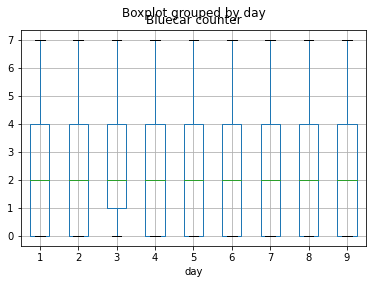

In [38]:
#Procedure 4
#Looking for outliers
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns

# Action:check otliers for the variable by use of boxplot 'Bluecar counter'
df2.boxplot (column =['Bluecar counter'], by='day', grid=True)
#Explanation: no noticable outliers hence no action taken
#df2['Bluecar counter'].hist(bins=100)

In [39]:
#Procedure 5
#Action:confirming there are no outliers by use of descriptive statistics
#Explanation: data looks properly skewed with no possible outliers, no action taken

df2['Bluecar counter'].describe()

count    5000.000000
mean        2.333600
std         2.035274
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         7.000000
Name: Bluecar counter, dtype: float64

In [41]:
#Procedure 6
#Action: looking for duplicated rows and columns
#Explanation: No action taken as there are no duplicates

df2.duplicated().sum()


0

In [43]:
#procefure 6
#Action: putting all letters to lower cases (or upper cases) in column 'City'
#Explanation: To avoid inconsistent capitalization usage within the same feature
df2['City'].str.lower()


0                    paris
1                    paris
2               le bourget
3                    paris
4                    paris
               ...        
4995              colombes
4996                 paris
4997                 paris
4998    fontenay-sous-bois
4999                 paris
Name: City, Length: 5000, dtype: object

In [45]:
#Eporting the cleaned dataset.
df2.to_csv('Autolib.csv', header=True, index=False)


In [130]:
#Anaswering questions.

#Question 1: Identify the most popular hour of the day for picking up a shared electric car 
#(Bluecar) in the city of Paris over the month of April 2018.


city =  df2[(df2['City'] == 'Paris')]
Most_popular = city.groupby(['Bluecar counter'])['hour'].value_counts()
Most_popular.sort_values(ascending=False).head()

Bluecar counter  hour
0                2       54
                 3       52
                 21      52
                 16      50
                 8       49
Name: hour, dtype: int64

In [ ]:
#Question 2: #What is the most popular hour for returning cars?


In [159]:
#Question 3:What station is the most popular?
#Overall?
df2['Station type'].value_counts()



station         4615
full_station     382
subs_center        3
Name: Station type, dtype: int64

In [158]:
#Question 3:What station is the most popular?
#At the most popular picking hour?
popular_station = df2.groupby(['Station type'])['hour'].value_counts()
popular_station.sort_values(ascending=False)


#station at21 00hrs

Station type  hour
station       21      220
              16      208
              2       205
              6       203
              9       202
              3       201
              5       198
              13      197
              7       196
              18      194
              20      191
              11      190
              8       189
              23      189
              14      189
              12      188
              17      187
              22      183
              0       183
              10      183
              15      183
              19      183
              4       181
              1       172
full_station  19       25
              7        23
              8        22
              1        22
              11       20
              9        19
              4        18
              14       18
              3        17
              15       17
              21       17
              6        16
              18       16
              13   

In [155]:
# Question 4: What postal code is the most popular for picking up Blue cars?
#Overall?
popular_postal = df2.groupby(['Bluecar counter'])['Postal code'].value_counts()
popular_postal


Bluecar counter  Postal code
0                75008          94
                 75015          79
                 75012          65
                 75006          62
                 75009          58
                                ..
7                93700           1
                 93800           1
                 94150           1
                 94300           1
                 94450           1
Name: Postal code, Length: 641, dtype: int64

In [154]:
#Question 5a: #Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? Utilib counter	Utilib 1.4 counter	
#finding most popular picking hr in paris ("Utilib counter")
city =  df2[(df2['City'] == 'Paris')]
Most_popular = city.groupby(['Utilib counter'])['hour'].value_counts()
Most_popular.sort_values(ascending=False).head()


Utilib counter  hour
0               21      140
                16      124
                3       120
                8       119
                2       117
Name: hour, dtype: int64

In [140]:
#Question 5b: #Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? Utilib counter	Utilib 1.4 counter	
#finding most popular picking hr in paris ("Utilib 1.4 counter)
city =  df2[(df2['City'] == 'Paris')]
Most_popular = city.groupby(['Utilib 1.4 counter'])['hour'].value_counts()
Most_popular.sort_values(ascending=False).head()


Utilib 1.4 counter  hour
0                   21      129
                    8       120
                    2       116
                    16      115
                    3       112
Name: hour, dtype: int64

In [150]:
#Question 5c: #Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? Utilib counter	Utilib 1.4 counter	
#finding the postal code is the most popular for picking up  ("Utilib counter")
popular_postal = df2.groupby(['Utilib counter'])['Postal code'].value_counts()
popular_postal






Utilib counter  Postal code
0               75015          257
                75016          216
                75017          201
                75011          174
                75008          165
                              ... 
2               75019            1
                92000            1
                93110            1
                94120            1
                95880            1
Name: Postal code, Length: 191, dtype: int64

In [145]:
#Question 5c: #Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? Utilib counter	Utilib 1.4 counter	
#finding most postal code is the most popular for picking up  ("Utilib 1.4 counter")

popular_postal = df2.groupby(['Utilib 1.4 counter'])['Postal code'].value_counts()
popular_postal

Utilib 1.4 counter  Postal code
0                   75015          245
                    75016          211
                    75017          185
                    75011          168
                    75008          154
                                  ... 
2                   92600            1
                    93350            1
                    93700            1
3                   75015            1
                    92310            1
Name: Postal code, Length: 217, dtype: int64